In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('responses.csv')

data.shape

(20, 14)

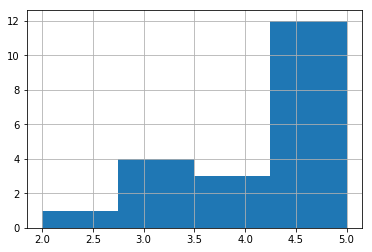

In [5]:
data["I've never done a quiz like this before. What did you think?"] =\
data["I've never done a quiz like this before. What did you think?"].str[0].astype(int)

# Students liked it!
data["I've never done a quiz like this before. What did you think?"].hist(bins=4)

In [6]:
names = data['Last name, First Name']
del data['Last name, First Name']
del data["I've never done a quiz like this before. What did you think?"]

In [7]:
data.columns

Index(['Extraverts tend to be happier than introverts.',
       'Extraverts usually like to be in charge.',
       'Conscientiousness measures how aware you are.',
       'Conscientious people are more easily disgusted.',
       'Neurotic people are more easily annoyed than emotionally stable people.',
       'People low in agreeableness often struggle with addictions.',
       'People low in neuroticism often have mental health problems.',
       'Disagreeableness causes people to have heated, angry arguments with each other.',
       'People high in openness tend to be more liberal politically.',
       'People low in conscientiousness tend to be more conservative politically.',
       'People high in openness are often considered "weird" by others.',
       'Liberals and Democrats tend to score lower in extraversion than conservatives and Republicans.'],
      dtype='object')

In [8]:
answer_key = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]

In [9]:
for i in data.columns:
    data[i] = data[i].str[0].astype(int)
    
data = data.replace(1, 0/6)
data = data.replace(2, 1/6)
data = data.replace(3, 2/6)
data = data.replace(4, 3/6)
data = data.replace(5, 4/6)
data = data.replace(6, 5/6)
data = data.replace(7, 6/6)

data.head()

,Extraverts tend to be happier than introverts.,Extraverts usually like to be in charge.,Conscientiousness measures how aware you are.,Conscientious people are more easily disgusted.,Neurotic people are more easily annoyed than emotionally stable people.,People low in agreeableness often struggle with addictions.,People low in neuroticism often have mental health problems.,"Disagreeableness causes people to have heated, angry arguments with each other.",People high in openness tend to be more liberal politically.,People low in conscientiousness tend to be more conservative politically.,"People high in openness are often considered ""weird"" by others.",Liberals and Democrats tend to score lower in extraversion than conservatives and Republicans.
0,0.333333,0.5,0.833333,1.0,0.833333,0.500000,0.166667,0.166667,1.000000,0.666667,1.000000,0.333333
1,0.666667,1.0,0.666667,1.0,0.666667,0.333333,0.500000,0.833333,0.333333,0.333333,0.833333,0.833333
2,0.333333,1.0,1.000000,1.0,1.000000,0.833333,0.166667,1.000000,1.000000,0.166667,1.000000,0.333333
3,1.000000,1.0,0.333333,1.0,0.833333,0.166667,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
4,1.000000,1.0,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000


In [10]:
((data - answer_key)**2).mean(axis=0).sort_values()

Conscientious people are more easily disgusted.                                                   0.026389
People high in openness tend to be more liberal politically.                                      0.033333
Neurotic people are more easily annoyed than emotionally stable people.                           0.038889
Extraverts usually like to be in charge.                                                          0.066667
People high in openness are often considered "weird" by others.                                   0.094444
People low in neuroticism often have mental health problems.                                      0.113889
People low in conscientiousness tend to be more conservative politically.                         0.212500
Liberals and Democrats tend to score lower in extraversion than conservatives and Republicans.    0.234722
People low in agreeableness often struggle with addictions.                                       0.238889
Extraverts tend to be happier than in

In [13]:
# Names removed for public notebook
scores = pd.DataFrame(np.array((data - answer_key)**2).mean(axis=1)).sort_values(0)

In [14]:
scores

,0
4,0.020833
11,0.053241
3,0.097222
5,0.113426
16,0.143519
7,0.150463
0,0.189815
13,0.189815
6,0.206019
15,0.215278


In [15]:
scores = 1 - scores

scores

,0
4,0.979167
11,0.946759
3,0.902778
5,0.886574
16,0.856481
7,0.849537
0,0.810185
13,0.810185
6,0.793981
15,0.784722


In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scores = ss.fit_transform(scores)

In [19]:
78 + (scores * 8)

array([[88.10273993],
       [86.41794709],
       [84.13144252],
       [83.2890461 ],
       [81.7245956 ],
       [81.36356857],
       [79.31774869],
       [79.31774869],
       [78.47535227],
       [77.99398288],
       [76.42953239],
       [76.30919004],
       [76.18884769],
       [76.18884769],
       [74.86508189],
       [74.38371251],
       [73.42097374],
       [73.18028905],
       [71.37515386],
       [67.52419879]])